# Define the libraries

In [156]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from datetime import timedelta

# Define Function

In [157]:
def PlotData(Begin,Duration,Mistake,OncourtFrame,OncourtVideo,Time,Data1,Data2,Figuur,player,pdf):
    Start = int((((OncourtFrame - OncourtVideo)*100) + Begin/10) - Mistake*100)
    Stop = int(Start + Duration*100)
    fig, ax = plt.subplots()
    ax.plot(Time[Start:Stop],Data1[Start:Stop],'r',Time[Start:Stop],Data2[Start:Stop],'b')
    ax.legend(['Wheel Rotation Speed X','Frame Rotation Speed Y'])
    ax.set_xlabel('Time (sec)')
    ax.set_title("Contact stopped " + str(Figuur) + ", " + str(player) + ", Video Time = " + str(timedelta(seconds=(int(Begin/1000)-Mistake))))
    pdf.savefig()

# Visualize Data
## Define player and match

In [158]:
Player = 11
Game = 1

## Insert Data player

In [159]:
df_Player = pd.read_csv('matrix_Player_' + str(Player) + '_game_' + str(Game) + '.csv')
df_Player.columns = ['frAcc','frRoAcc','frDispl','frRoAng','frSpeed','timeLine','frameRotationalSpeedX','frameRotationalSpeedY','frameRotationalSpeedZ','wheelRotationalSpeedX','wheelRotationalSpeedY','wheelRotationalSpeedZ','frRoSpeed']
df_Action = pd.read_csv('Ned_DUI_Game_' + str(Game) + '.csv')
df_Player

,frAcc,frRoAcc,frDispl,frRoAng,frSpeed,timeLine,frameRotationalSpeedX,frameRotationalSpeedY,frameRotationalSpeedZ,wheelRotationalSpeedX,wheelRotationalSpeedY,wheelRotationalSpeedZ,frRoSpeed
0,0.000000,0.0,0.0,0.000000,0.000000,0.01,NaN,NaN,NaN,NaN,NaN,NaN,0.00000
1,0.000000,0.0,0.0,0.000000,0.000000,0.02,NaN,NaN,NaN,NaN,NaN,NaN,0.00000
2,0.000000,0.0,0.0,0.000000,0.000000,0.03,NaN,NaN,NaN,NaN,NaN,NaN,0.00000
3,0.000000,0.0,0.0,0.000000,0.000000,0.04,NaN,NaN,NaN,NaN,NaN,NaN,0.00000
4,0.000000,0.0,0.0,0.000000,0.000000,0.05,NaN,NaN,NaN,NaN,NaN,NaN,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887404,0.057182,4805.5,-1425.0,0.087601,0.000093,8874.00,0.60667,1.0967,1.0033,-0.56000,0.031111,-0.94889,6.39870
887405,0.040649,4805.5,-1425.0,0.151590,0.000665,8874.10,0.53455,1.0500,1.0500,-0.51800,-0.042000,-0.93800,-0.26291
887406,-0.033651,4805.5,-1425.0,0.148960,0.001071,8874.10,0.53200,1.0710,1.0710,-0.44333,-0.070000,-0.91000,NaN
887407,NaN,NaN,NaN,NaN,NaN,NaN,0.60667,1.1200,1.1200,-0.51800,-0.070000,-0.95900,NaN


## Define boundaries
### Get Timestamps from CSV

In [160]:
df_Action_Player = df_Action.loc[df_Action["Players Group Box"] == ("Player " + str(Player))]
df_Action_Player_Fast_defence = df_Action_Player.loc[df_Action_Player["Player"] == "Contact stopped"].iloc[::-1]
Timestamp = df_Action_Player_Fast_defence.Position.to_numpy()
print(len(Timestamp))
Timestamp

8


array([ 791360,  821560, 1069240, 1389480, 1499760, 1515560, 3301040,
       3407360])

### Synchronize
Times consist of the oncourt times in the video and the oncourt frames in Matlab

In [161]:
Times = [
         [((10*60)+18.40),3728.3],
         [((30*60)+1.68),4931],
         [((48*60)+38.96),6997.7],
         [((55*60)+35.72),7552.6]
        ]
Times[0][0]

618.4

In [214]:
Error = [1,1,-5,10,1,5,20,-65]
print(len(Error))

8


### Visualize

In [215]:
pdf = PdfPages('Player_' + str(Player) + '_' + str(Game) + '_ContactStopped.pdf')

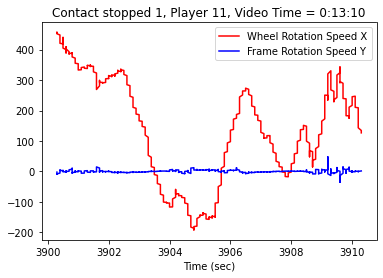

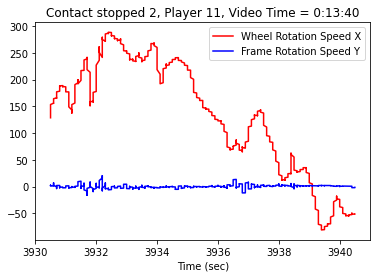

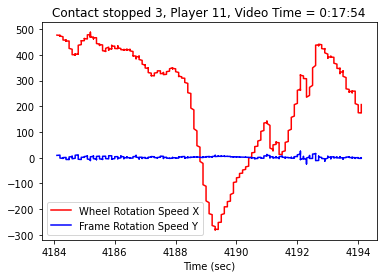

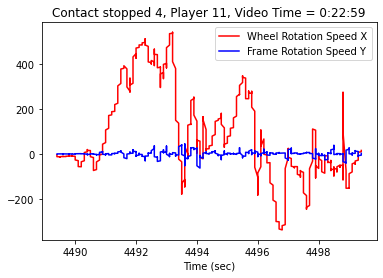

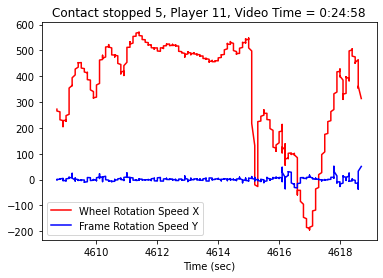

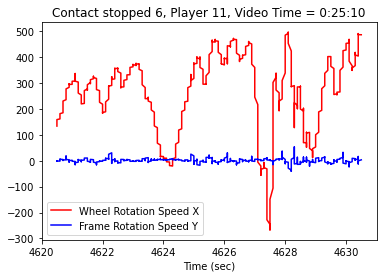

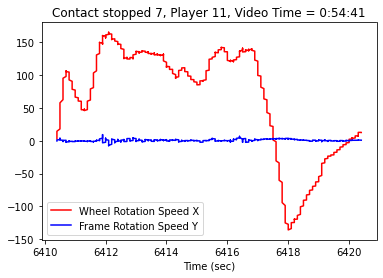

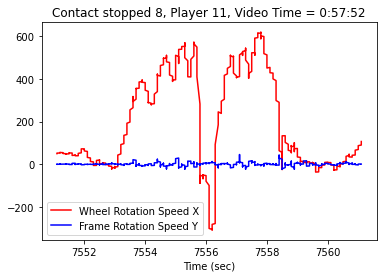

In [216]:
Quator = 0;
for i in range(0,len(Timestamp)):
    if Quator < (len(Times)-1):
        if Timestamp[i] >= (Times[Quator+1][0] * 1000):
            Quator = Quator + 1
    PlotData(Timestamp[i], 10, Error[i], Times[Quator][1], Times[Quator][0], df_Player.timeLine.to_numpy(), 
             df_Player.wheelRotationalSpeedX.to_numpy(), 
             df_Player.frameRotationalSpeedX.to_numpy(),
             i+1,('Player ' + str(Player)), pdf)

In [217]:
pdf.close()